In [18]:
#plotly library
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
reviews = pd.read_csv('data/winemag-data-130k-v2.csv.zip',index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


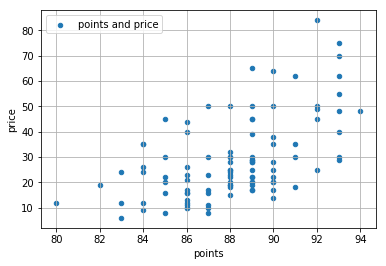

In [20]:
#scatter plot for sample of data 
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='points', y='price',grid=True,label='points and price')

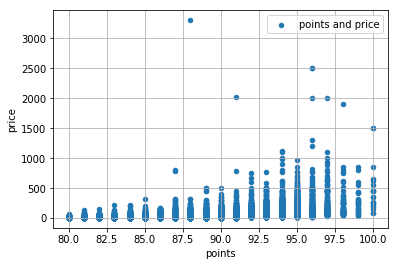

In [21]:
#Scatter Plot for the whole dataset
reviews.plot(kind='scatter',x='points',y='price',grid=True,label='points and price')

In [22]:
reviews.shape

(129971, 13)

In [23]:

US=reviews.loc[reviews["country"]=="US"]
US.shape

(54504, 13)

In [24]:
#choropleth
df= reviews['country'].value_counts().reset_index()
df.columns = ['country', 'total']
df.head()


,country,total
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691


In [25]:
from plotly.offline import iplot
import plotly.graph_objs as go

iplot([go.Choropleth(
        locations = df['country'],
        locationmode = 'country names',
        z = df['total'],
        text = df['country']
  

)])

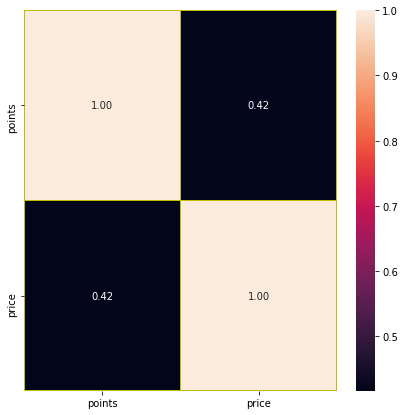

In [26]:
#Heat Map
reviews_sub=reviews[['points','price']]

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(reviews_sub.corr(),annot=True,linewidths=0.6,linecolor='y',fmt='.2f',ax=ax)
plt.show()

In [27]:
#surface plot

df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()
h=df['points'].unique()
w=df['price'].unique()
iplot([go.Surface(z=v, x=h, y=w)])

In [28]:
#z value in surface plot
df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()

df = df[df["price"] < 100]
v = pd.pivot_table(df, index='price',values='n', columns='points').fillna(0).values.tolist()
v


[[0.0,
  0.0,
  1.0,
  1.0,
  5.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [2.0,
  4.0,
  3.0,
  14.0,
  10.0,
  8.0,
  2.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.0,
  2.0,
  12.0,
  18.0,
  28.0,
  32.0,
  11.0,
  9.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [10.0,
  20.0,
  26.0,
  70.0,
  94.0,
  88.0,
  68.0,
  41.0,
  12.0,
  3.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [23.0,
  31.0,
  63.0,
  109.0,
  183.0,
  196.0,
  141.0,
  99.0,
  34.0,
  9.0,
  3.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [20.0,
  47.0,
  73.0,
  138.0,
  202.0,
  295.0,
  269.0,
  180.0,
  78.0,
  17.0,
  17.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [39.0,
  80.0,
  173.0,
  289.0,
  546.0,
  784.0,
  652.0,
  491.

In [29]:
#data represented in surface plot
df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()

df = df[df["price"] < 100]
v = pd.pivot_table(df, index='price',values='n', columns='points').fillna(0)
v

points,80,81,82,83,84,85,86,87,88,89,...,91,92,93,94,95,96,97,98,99,100
price,,,,,,,,,,,,,,,,,,,,,
4.0,0.0,0.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,2.0,4.0,3.0,14.0,10.0,8.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,3.0,2.0,12.0,18.0,28.0,32.0,11.0,9.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,10.0,20.0,26.0,70.0,94.0,88.0,68.0,41.0,12.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,23.0,31.0,63.0,109.0,183.0,196.0,141.0,99.0,34.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,20.0,47.0,73.0,138.0,202.0,295.0,269.0,180.0,78.0,17.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,39.0,80.0,173.0,289.0,546.0,784.0,652.0,491.0,256.0,77.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,20.0,44.0,84.0,150.0,313.0,398.0,423.0,355.0,162.0,66.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,40.0,69.0,128.0,236.0,523.0,660.0,749.0,783.0,447.0,164.0,...,26.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# x value in surface plot

df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()
h=df['points'].unique()
h

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [31]:
# y values in surface plot 
w=df['price'].unique()
w

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       32., 35., 36., 38., 40., 42., 44., 45., 55., 69., 31., 34., 37.,
       43., 48., 50., 53., 60., 62., 65., 72., 75., 76., 85., 90., 95.,
        4., 33., 39., 41., 46., 47., 49., 54., 73., 79., 80., 51., 52.,
       63., 64., 70., 81., 56., 57., 58., 59., 83., 89., 67., 68., 84.,
       92., 99., 61., 66., 77., 78., 82., 87., 88., 94., 96., 74., 86.,
       93., 97., 98., 91., 71.])

In [32]:
# no. of x values which is the same no. of columns above
h=df['points'].nunique()
h

21